In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
# Normalize
x_train = x_train/255.
y_train = y_train/255.
x_test  = x_test/255.
y_test  = y_test/255.

0.011764705882352941

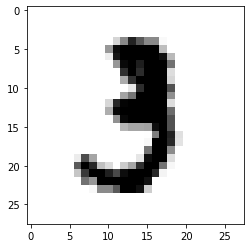

In [5]:
plt.imshow(x_train[10],'gray_r')
y_train[10]

In [6]:
variance = tf.Variable([1.])

def make_prior(latent_params_size):
  means = tf.zeros(latent_params_size)
  stds = tf.ones(latent_params_size)
  return tfd.MultivariateNormalDiag(means, stds)

def make_encoder(data, latent_params_size):
  x = tf.layers.flatten(data)
  x = tf.layers.dense(x, 256, tf.nn.relu)
  x = tf.layers.dense(x, 256, tf.nn.relu)
  means = tf.layers.dense(x, latent_params_size) # the mean can be any real number
  variances = tf.layers.dense(x, latent_params_size, tf.nn.softplus) # the variance needs to be positive
  return tfd.MultivariateNormalDiag(means, variances)

def make_decoder(x, data_shape):
  flat_size = np.prod(data_shape)
  variances = variance*tf.ones(data_shape)
  x = tf.layers.dense(x, 256, tf.nn.relu)
  x = tf.layers.dense(x, 256, tf.nn.relu)
  means =  tf.reshape(tf.layers.dense(x, flat_size), [-1] + data_shape)
  return tfd.Independent(tfd.MultivariateNormalDiag(means, variances), 2)

make_encoder = tf.make_template('encoder', make_encoder)
make_decoder = tf.make_template('decoder', make_decoder)

In [7]:
data = tf.placeholder(tf.float32, [None, 28, 28])
prior = make_prior(latent_params_size=2)
posterior = make_encoder(data, latent_params_size=2)
code = posterior.sample()
samples = make_decoder(prior.sample(10), [28, 28]).mean()

likelihood = make_decoder(code, [28, 28]).log_prob(data)
divergence = tfd.kl_divergence(posterior, prior)
elbo = tf.reduce_mean(likelihood - divergence)
optimize = tf.train.AdamOptimizer(0.001).minimize(-elbo)

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.Dense instead.


In [8]:
def plot_codes(ax, codes, labels):
  ax.scatter(codes[:, 0], codes[:, 1], s=2, c=labels, alpha=0.1)
  ax.set_aspect('equal')
  ax.set_xlim(codes.min() - .1, codes.max() + .1)
  ax.set_ylim(codes.min() - .1, codes.max() + .1)
  ax.tick_params(
      axis='both', which='both', left='off', bottom='off',
      labelleft='off', labelbottom='off')


def plot_samples(ax, samples):
  for index, sample in enumerate(samples):
    ax[index].imshow(sample, cmap='gray')
    ax[index].axis('off')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Epoch 0 elbo -7656663.5
Epoch 1 elbo -2209152.5
Epoch 2 elbo 1225184.5
Epoch 3 elbo 1374840.1
Epoch 4 elbo 1507642.4
Epoch 5 elbo 1593733.1
Epoch 6 elbo 1639135.4
Epoch 7 elbo 1641000.0
Epoch 8 elbo 1699194.1
Epoch 9 elbo 1721801.5
Epoch 10 elbo 1759086.1
Epoch 11 elbo 1761950.2
Epoch 12 elbo 1774283.4
Epoch 13 elbo 1824744.6
Epoch 14 elbo 1841279.4
Epoch 15 elbo 1871168.5
Epoch 16 elbo 1870216.4
Epoch 17 elbo 1868542.8
Epoch 18 elbo 1893583.2
Epoch 19 elbo 1910591.1
Epoch 20 elbo 1906315.2
Epoch 21 elbo 1913237.1
Epoch 22 elbo 1914506.5
Epoch 23 elbo 1929448.6
Epoch 24 elbo 1940479.4
Epoch 25 elbo 1956785.8
Epoch 26 elbo 1961134.1
Epoch 27 elbo 1944459.2
Epoch 28 elbo 1943803.1
Epoch 29 elbo 1964595.4
Epoch 30 elbo 1971570.5
Epoch 31 elbo 1972505.8
Epoch 32 elbo 1977607.0
Ep

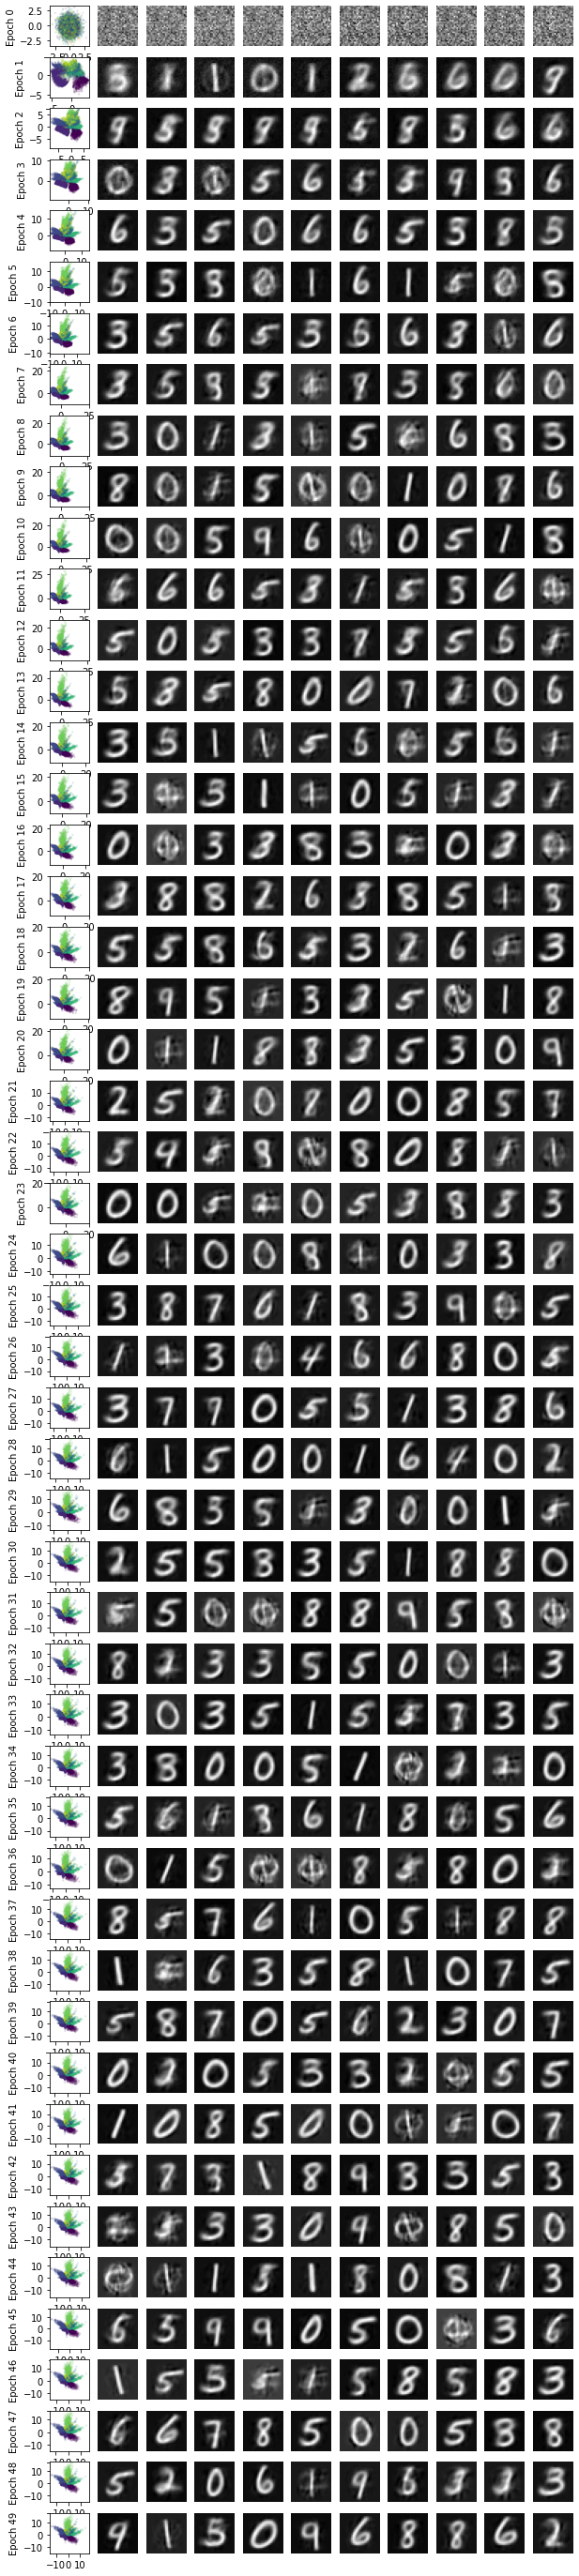

In [9]:
epochs = 50
batch_size = 128
fig, ax = plt.subplots(nrows=epochs, ncols=11, figsize=(10, epochs))
with tf.train.MonitoredSession() as sess:
  for epoch in range(epochs):
    feed = {data: x_test}
    test_elbo, test_codes, test_samples = sess.run([elbo, code, samples], feed)
    print('Epoch', epoch, 'elbo', test_elbo)
    ax[epoch, 0].set_ylabel('Epoch {}'.format(epoch))
    plot_codes(ax[epoch, 0], test_codes, y_test)
    plot_samples(ax[epoch, 1:], test_samples)
    for i in range(len(x_train)//batch_size):
      feed = {data: x_train[batch_size*i:batch_size*(i+1)]}
      sess.run(optimize, feed)
    perm = np.arange(len(x_train))
    np.random.shuffle(perm)
    x_train = x_train[perm]
    y_train = y_train[perm]

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
mnist.load_data?

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/')

In [ ]:
mn